# Prérequis

Ce notebook requiert les modules matplotlib, seaborn, plotly, ainsi que le module imgtools qui regroupe des fonctions nous avons crées pour ce projet.  
Le notebook utilise également le module 'tqdm' (https://github.com/tqdm/tqdm#readme). Si vous ne souhaitez pas le télécharger, laisser la valeur False ci-dessous, sinon la passer à True.

In [1]:
with_tqdm = False

# Initialisation

In [2]:
# Modules usuels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import random
import pickle
import os

# Modules additionnels
import imgtools as imt
if imt.version != 2:
    raise ImportError("Ta version de imgtools n'est pas la bonne !")
if with_tqdm:
    from tqdm import tqdm
else:
    def tqdm(it):
        return it

# Relative paths
PATH_TRAIN = "./images/image_train"
PATH_TEST = "./images/image_test"

# Extraction des données

## Features

In [3]:
X_train = pd.read_csv('X_train_update.csv', index_col=0)
X_train.head()

designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  
0                                                NaN  3804725264  1263597046  
1                                                NaN   436067568  1008141237  
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978  
3                                                NaN    50418756   457047496  
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786

## Target

In [4]:
y_train = pd.read_csv("Y_train_CVw08PX.csv", index_col=0)
y_train.head()

prdtypecode
0           10
1         2280
2           50
3         1280
4         2705

## Fusion des données X et y

In [5]:
df = pd.concat([X_train, y_train], axis=1)

In [6]:
df.head()

designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

   prdtypecode  
0           10  
1         2280  
2           50  
3         1280  
4         2705

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
 4   prdtypecode  84916 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


## Formatage des données

In [8]:
# Mettons les variables catégorielles sous forme de chaine
cols_cat = ['productid', 'imageid', 'prdtypecode']
df[cols_cat] = df[cols_cat].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  object
 3   imageid      84916 non-null  object
 4   prdtypecode  84916 non-null  object
dtypes: object(5)
memory usage: 3.9+ MB


# Labels des classes

## Labels d'origine

In [9]:
prdtypecodes = list(df['prdtypecode'].unique())
print("Modalités d'origine des {} classes :\n".format(len(prdtypecodes)))
print(prdtypecodes)

Modalités d'origine des 27 classes :

['10', '2280', '50', '1280', '2705', '2522', '2582', '1560', '1281', '1920', '2403', '1140', '2583', '1180', '1300', '2462', '1160', '2060', '40', '60', '1320', '1302', '2220', '2905', '2585', '1940', '1301']


## Modification des labels (par commodité)

In [10]:
# Création d'une table de correspondance
target_labels = [str(n) for n in range(27)]
lab_enc = pd.DataFrame({'prdtypecode': prdtypecodes, 'target': target_labels}).astype('str')
lab_enc

prdtypecode target
0           10      0
1         2280      1
2           50      2
3         1280      3
4         2705      4
5         2522      5
6         2582      6
7         1560      7
8         1281      8
9         1920      9
10        2403     10
11        1140     11
12        2583     12
13        1180     13
14        1300     14
15        2462     15
16        1160     16
17        2060     17
18          40     18
19          60     19
20        1320     20
21        1302     21
22        2220     22
23        2905     23
24        2585     24
25        1940     25
26        1301     26

In [11]:
# Remplacement des labels dans le dataframe
df['target'] = df['prdtypecode'].replace(prdtypecodes, target_labels)
df = df.drop(columns=['prdtypecode'])
df.head()

designation  \
0  Olivia: Personalisiertes Notizbuch / 150 Seite...   
1  Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
2  Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
3  Peluche Donald - Europe - Disneyland 2000 (Mar...   
4                               La Guerre Des Tuques   

                                         description   productid     imageid  \
0                                                NaN  3804725264  1263597046   
1                                                NaN   436067568  1008141237   
2  PILOT STYLE Touch Pen de marque Speedlink est ...   201115110   938777978   
3                                                NaN    50418756   457047496   
4  Luc a des id&eacute;es de grandeur. Il veut or...   278535884  1077757786   

  target  
0      0  
1      1  
2      2  
3      3  
4      4

## Interprétation des codes produits

In [12]:
# Après visualisation des images et désignations par classe, nous proposons les interprétations suivantes.
# Ce travail a été réalisé pour une meilleure compréhension des résultats.
prdtype_decode = pd.read_csv('prdtype_decode.csv').astype('str')
prdtype_decode

prdtypecode                           prdtype
0           10                     livres_adulte
1         2280                         magazines
2           50           accessoires_jeux_videos
3         1280                    jouets_enfance
4         2705               livres_et_illustres
5         2522                         papeterie
6         2582           mobilier_jardin_cuisine
7         1560       mobilier_interieur_litterie
8         1281                      jeux_societe
9         1920             accessoires_interieur
10        2403                   livres_jeunesse
11        1140                      goodies_geek
12        2583                       piscine_spa
13        1180                figurines_wargames
14        1300  modeles_reduits_ou_telecommandes
15        2462                         jeux_geek
16        1160                    cartes_a_jouer
17        2060              decoration_interieur
18          40                jeux_videos_import
19          60            jeux_et_consoles_retro
20        1320                    petite_enfance
21        1302                    jouets_enfants
22        2220          pour_animaux_domestiques
23        2905        jeux_videos_dematerialises
24        2585                  jardin_bricolage
25        1940                        nourriture
26        1301                  materiel_enfance

In [13]:
# Ajout à la table de correspondance
lab_enc = lab_enc.merge(prdtype_decode, on='prdtypecode', how='left')
lab_enc

prdtypecode target                           prdtype
0           10      0                     livres_adulte
1         2280      1                         magazines
2           50      2           accessoires_jeux_videos
3         1280      3                    jouets_enfance
4         2705      4               livres_et_illustres
5         2522      5                         papeterie
6         2582      6           mobilier_jardin_cuisine
7         1560      7       mobilier_interieur_litterie
8         1281      8                      jeux_societe
9         1920      9             accessoires_interieur
10        2403     10                   livres_jeunesse
11        1140     11                      goodies_geek
12        2583     12                       piscine_spa
13        1180     13                figurines_wargames
14        1300     14  modeles_reduits_ou_telecommandes
15        2462     15                         jeux_geek
16        1160     16                    cartes_a_jouer
17        2060     17              decoration_interieur
18          40     18                jeux_videos_import
19          60     19            jeux_et_consoles_retro
20        1320     20                    petite_enfance
21        1302     21                    jouets_enfants
22        2220     22          pour_animaux_domestiques
23        2905     23        jeux_videos_dematerialises
24        2585     24                  jardin_bricolage
25        1940     25                        nourriture
26        1301     26                  materiel_enfance

# Doublons et identifiants

In [14]:
# Duplicatas éventuels
df.duplicated().any()

False

Le dataframe ne compte aucun doublon.

In [15]:
print("Nombres de lignes du dataframe : ", len(df))
print("Nombre de 'productid' distincts : ", len(df['productid'].unique()))
print("Nombre de 'imageid' distincts : ", len(df['imageid'].unique()))

Nombres de lignes du dataframe :  84916
Nombre de 'productid' distincts :  84916
Nombre de 'imageid' distincts :  84916


Les variables et 'productid' et 'imageid' sont donc uniques à chaque article mis en vente.  
On va pouvoir utiliser 'productid' comme index.  
De plus on a la confirmation que chaque article en vente est associé à une image et une seule.

In [16]:
# Changement d'index
df = df.set_index('productid')
df.head()

designation  \
productid                                                       
3804725264  Olivia: Personalisiertes Notizbuch / 150 Seite...   
436067568   Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...   
201115110   Grand Stylet Ergonomique Bleu Gamepad Nintendo...   
50418756    Peluche Donald - Europe - Disneyland 2000 (Mar...   
278535884                                La Guerre Des Tuques   

                                                  description     imageid  \
productid                                                                   
3804725264                                                NaN  1263597046   
436067568                                                 NaN  1008141237   
201115110   PILOT STYLE Touch Pen de marque Speedlink est ...   938777978   
50418756                                                  NaN   457047496   
278535884   Luc a des id&eacute;es de grandeur. Il veut or...  1077757786   

           target  
productid          
3804725264      0  
436067568       1  
201115110       2  
50418756        3  
278535884       4

# Sauvegarde des données

In [17]:
# Sauvegarde de la table de correspondance des labels
lab_enc.to_csv('labels_encoding.csv', index=False)

# Sauvegarde du dataset
df.to_csv('trainset.csv', index=True)

# Distribution des classes

In [18]:
# Calcul des distributions de classes et des NAs
count_na = lambda x: x.isnull().sum()
func_groupby = {'description': count_na, "imageid": 'count'}
class_description = df[['target', 'imageid', 'description']].groupby("target").agg(func_groupby).reset_index().rename({"description":"nb_nan_per_class", "imageid":"count_prod_per_class"}, axis=1)
class_description['%_nan'] = round((class_description["nb_nan_per_class"]/class_description['count_prod_per_class'])*100)
class_description['%Class'] = round((class_description["count_prod_per_class"]/len(df))*100)
class_description = class_description.set_index('target')

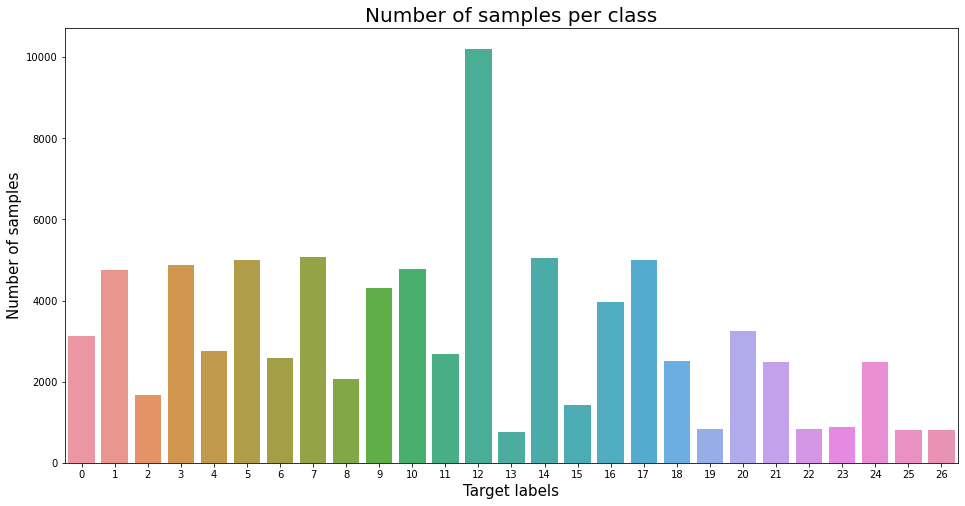

In [19]:
# Affichage de la distribution des classes
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(ax=ax, data=df, x='target')
plt.title("Number of samples per class", fontsize=20)
plt.xlabel("Target labels",fontsize=15)
plt.ylabel("Number of samples", fontsize=15);

In [20]:
# Classement des classes par ordre de dominance
cols = ["count_prod_per_class", "%Class"]
class_description[cols].sort_values(by='%Class', ascending=False)

count_prod_per_class  %Class
target                              
12                     10209    12.0
1                       4760     6.0
10                      4774     6.0
7                       5073     6.0
5                       4989     6.0
14                      5045     6.0
3                       4870     6.0
17                      4993     6.0
9                       4303     5.0
16                      3953     5.0
0                       3116     4.0
20                      3241     4.0
18                      2508     3.0
21                      2491     3.0
24                      2496     3.0
4                       2761     3.0
6                       2589     3.0
11                      2671     3.0
2                       1681     2.0
15                      1421     2.0
8                       2070     2.0
19                       832     1.0
22                       824     1.0
23                       872     1.0
25                       803     1.0
26                       807     1.0
13                       764     1.0

Classes déséquilibrées: la classe la plus majoritaire représente 12% et les minoritaires représentent 1% (ou moins).

#### Quelles stratégies adopter ?

1) Undersampling => cela revient à avoir ~800 lignes par classe (est-ce suffisant ? )  
2) Undersampling + oversampling à ~4000 lignes (on utilise la duplication de données)  
3) Pondération des samples en fonction de leur classe (pénaliser les classes majoritaires)  
4) Changer les seuils de probabilité en fonction de la taille des classes (pénaliser les classes majoritaires)  

# Valeurs manquantes

## Vue globale

In [21]:
# Nombre de NAs par colonne
na_counts = df.isna().sum()
na_counts

designation        0
description    29800
imageid            0
target             0
dtype: int64

In [22]:
descr_na_ratio = round(df['description'].isna().sum()/len(df)*100)
fmtstr = "Le champ 'description' compte {} valeurs manquantes, soit {}% de toutes les entrées."
print(fmtstr.format(na_counts['description'], descr_na_ratio))

Le champ 'description' compte 29800 valeurs manquantes, soit 35% de toutes les entrées.


#### Il faut reflechir à une stratégie de traitement des valeurs manquantes

1) Traiter uniquement la colonne "designation"   
2) Remplacer les NAs de la colonne "description" par les valeurs de "designation"   
3) Fusionner la colonne "designation" et colonne "description"

## Répartition des valeurs manquantes selon les classes

In [23]:
# Classement des classes ayant le plus de NAs
class_description.drop(columns=['%Class']).sort_values(by='%_nan', ascending=False).head(10)

nb_nan_per_class  count_prod_per_class  %_nan
target                                               
10                  4648                  4774   97.0
15                  1368                  1421   96.0
1                   4440                  4760   93.0
16                  3604                  3953   91.0
0                   2778                  3116   89.0
13                   611                   764   80.0
18                  1642                  2508   65.0
11                  1726                  2671   65.0
4                   1025                  2761   37.0
20                  1101                  3241   34.0

In [24]:
print("Les catégories ayant plus de 40% de NAs sont: ",list(class_description[class_description["%_nan"]>40].index))

Les catégories ayant plus de 40% de NAs sont:  ['0', '1', '10', '11', '13', '15', '16', '18']


In [25]:
# Affichage
fig = go.Figure(data=[
    go.Bar(name='Nb_prod_par_cat', x=class_description.index, y=class_description["count_prod_per_class"]),
    go.Bar(name='Nb_NAs_par_cat', x=class_description.index, y=class_description["nb_nan_per_class"])
])
# Change the bar mode
fig.update_layout(barmode='group', title_text='Nombre de produits et de valeurs manquantes par classe',
                  xaxis_title="Classes", yaxis_title="Quantité de produits")
fig.show()

Il est clair que certaines classes de produits sont plus touchées que d'autres par les descriptions manquantes. Peut-être que certains produits sont davantage vendus par des amateurs qui ne prennent pas la peine de tout remplir rigoureusement. Souvent l'essentiel des informations se trouve dans le champ 'designation'.

# Affichage de 5 images par classe

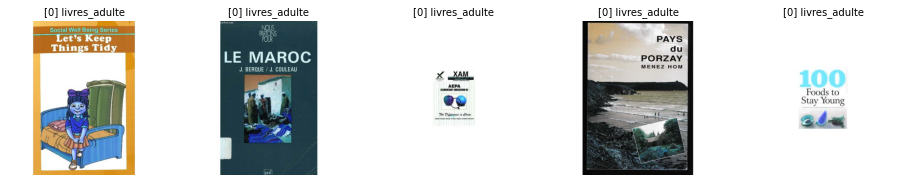

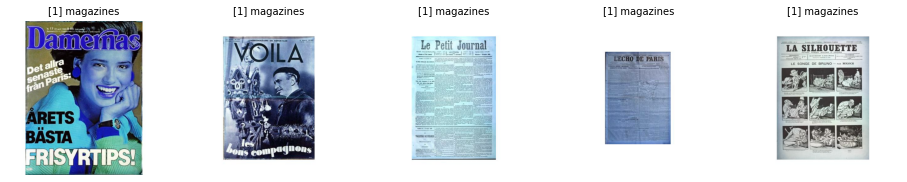

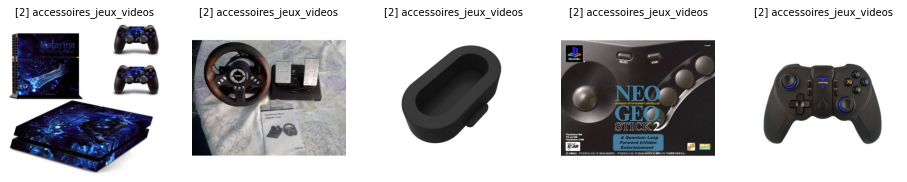

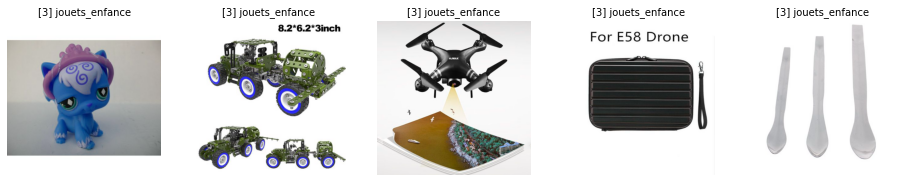

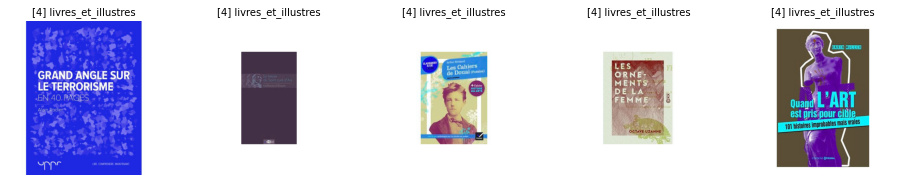

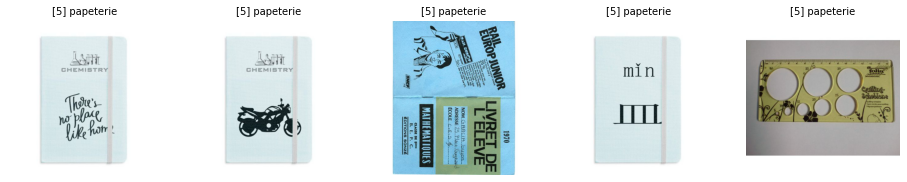

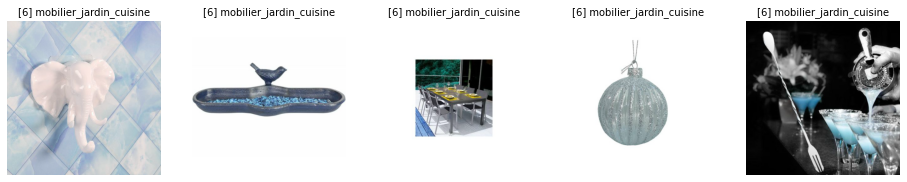

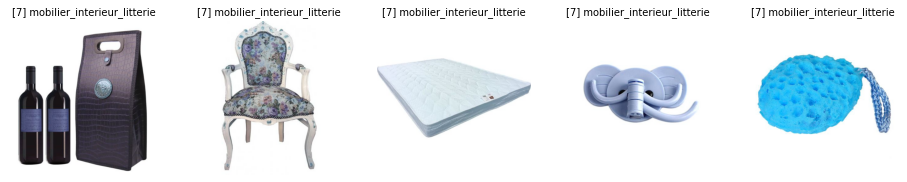

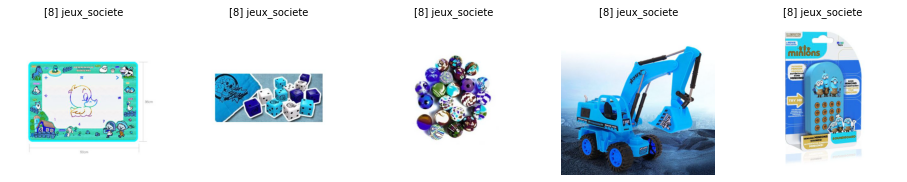

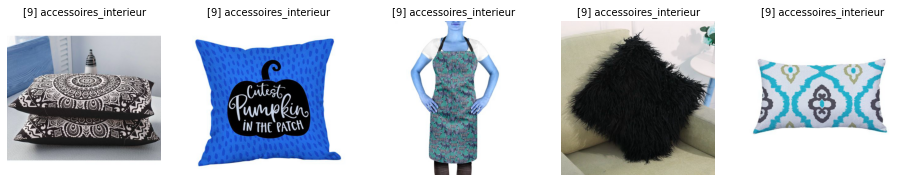

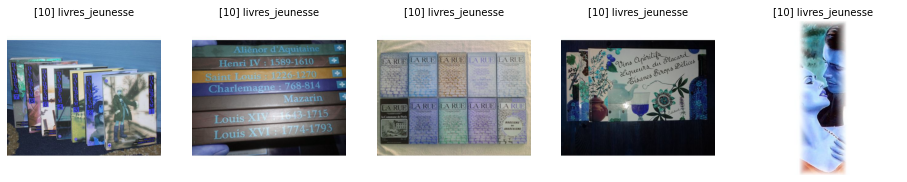

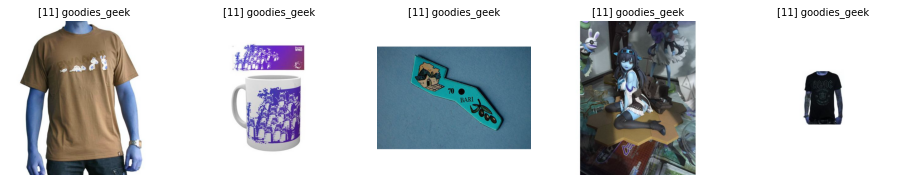

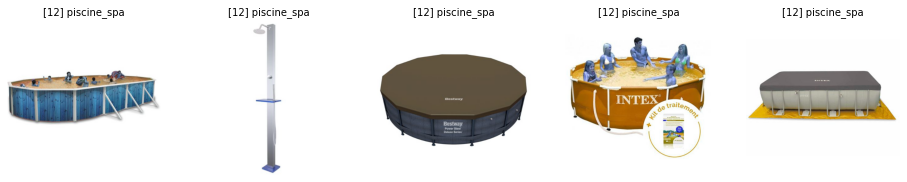

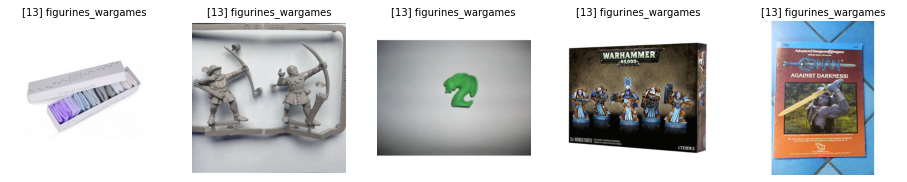

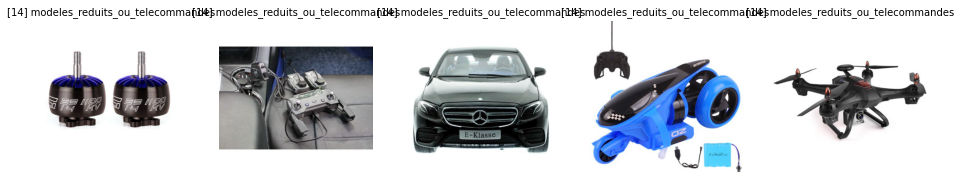

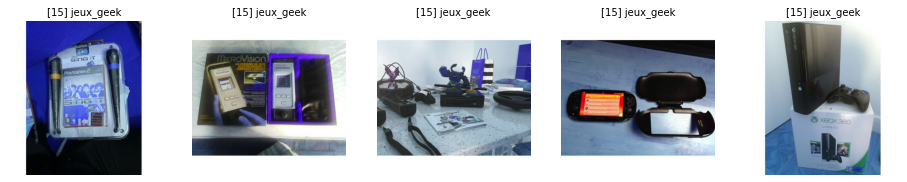

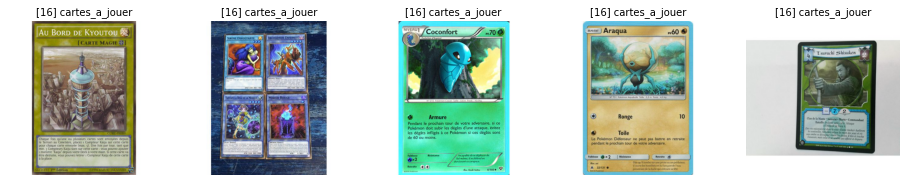

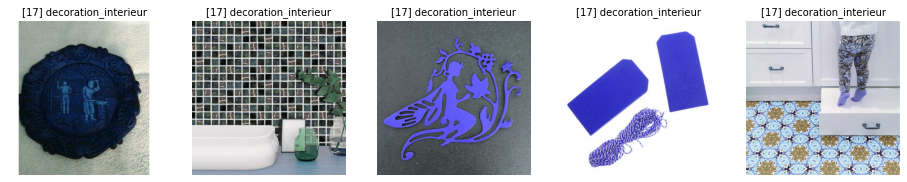

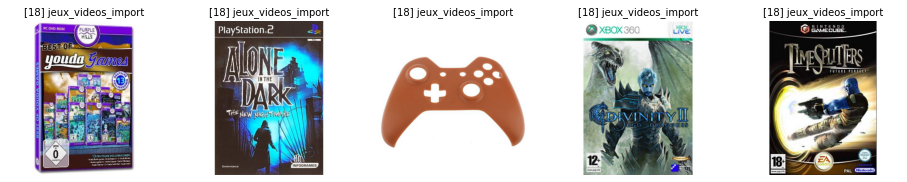

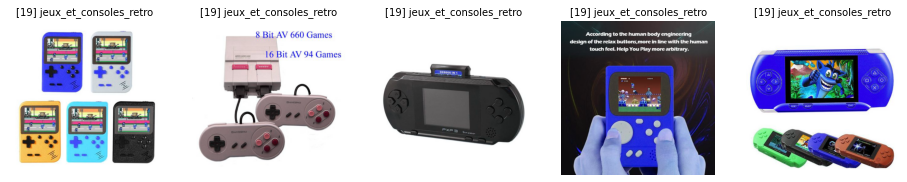

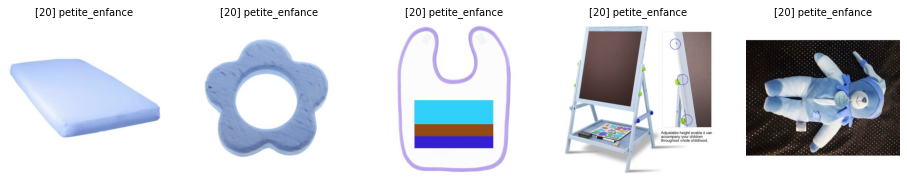

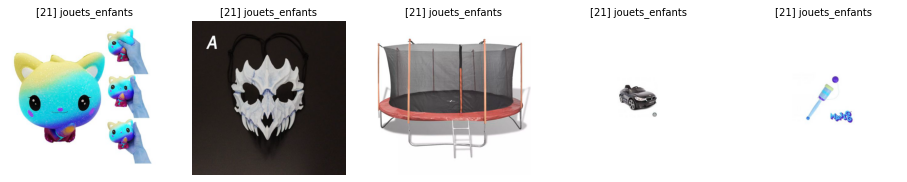

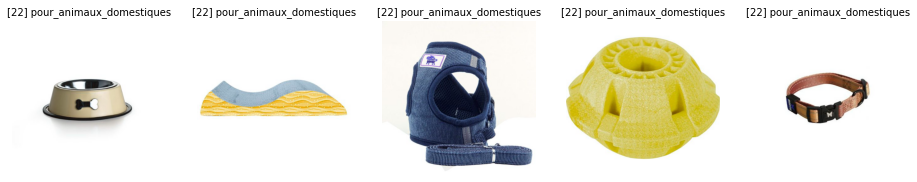

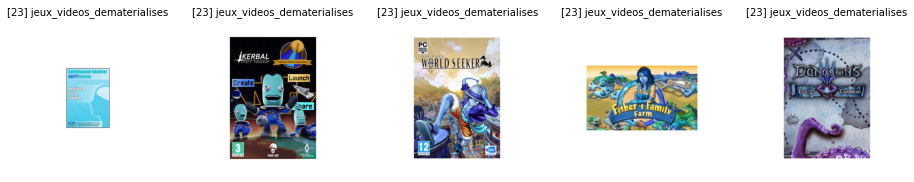

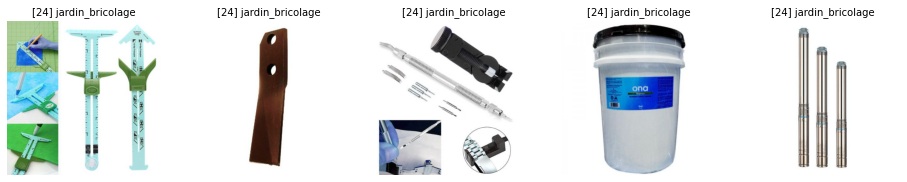

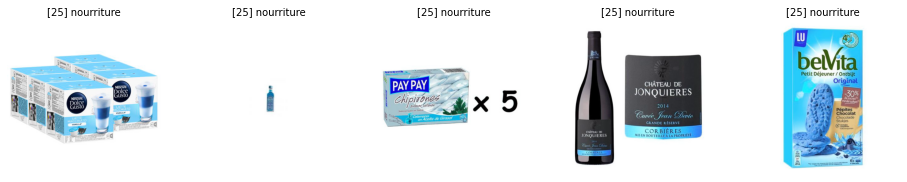

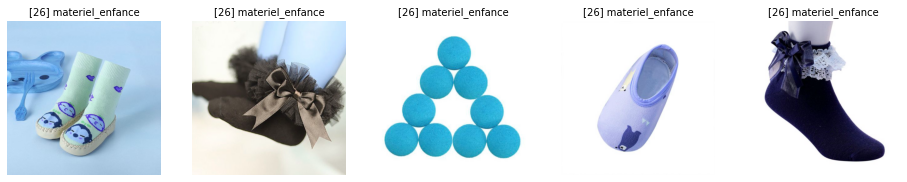

In [26]:
with plt.rc_context({'figure.max_open_warning': 0}):

    # Iterate through product codes
    for label in tqdm(lab_enc['target']):

        # Indexes matching label
        idxs = list(df[df['target'] == label].index)

        # Sample random specimens
        idxs_rand = random.sample(idxs, 5)
        
        # Extract imageids
        imageids = df.loc[idxs_rand, 'imageid']

        # Titres
        idx_lab = (lab_enc['target'] == label)
        titles = "[{}] ".format(list(lab_enc.loc[idx_lab, 'target'])[0])
        titles += list(lab_enc.loc[idx_lab, 'prdtype'])[0]
        titles = [titles]*5

        # Load and display images
        images = imt.load_id(PATH_TRAIN, imageids)
        imt.disp_grid(images, 1, 5, titles=titles)

On constate déjà que même au sein d'une même classe, les images représentent des objets très divers.

## Images moyennes par classe

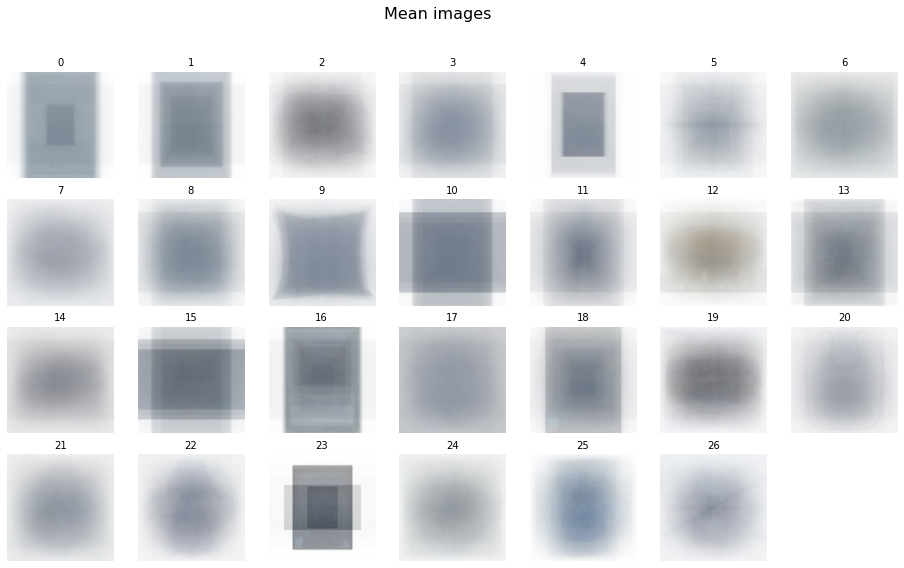

In [27]:
compute_mean_images = False # EDIT to run (or not) /!\ REALLY LONG computation /!\
save_result = False # EDIT to run (or not) /!\ Overwrites previous savefile if it exists /!\


SAVEFILE_NAME = 'mean_images_by_class.pkl'


if compute_mean_images:
    
    # Create empty container
    mean_images = dict()
    
    # Iterate through product codes
    for label in tqdm(lab_enc['target']):

        # Imageids matching label
        idxs = list(df[df['target'] == label].index)
        imageids = df.loc[idxs, 'imageid']
        
        # Load images
        images = imt.load_id(PATH_TRAIN, imageids)
        
        # Compute mean
        mean_images[label] = imt.mean_img(images)

        
if save_result:
    
    # Serialize in binary file
    with open(SAVEFILE_NAME, 'wb') as savefile:
        pickle.dump(mean_images, savefile)
    print("Results saved in '{}'.".format(SAVEFILE))



# Load and display
with open('mean_images_by_class.pkl', 'rb') as savefile:
    mean_images = pickle.load(savefile)
titles = list(lab_enc['target'])
imt.disp_grid(list(mean_images.values()), 4, 7, titles=titles, suptitle="Mean images")

Pour plusieurs classes, la dispersion de la luminance (les nuances de gris) est telle qu'on observe un genre de bruit gaussien 2D centré (classes 6, 7, 21, 24, ...). Pour quelques classes cependant, on observe des formes plus géométriques, surtout rectangulaires (classes 0, 1, 4, 10, 13, 15, 16, 23, ...). On pourrait imaginer que les objets concernés soit plutôt rectangulaires, et placés soit en portrait soit en paysage sur les images. Cependant, il faut être prudent, car toutes images ont été préformattées en RGB 500x500 pixels, et cela a pu créer un effet de cadre/bandeau sur les images.

Les couleurs observées, à dominante gris-brun, indiquent que la répartition entre les trois couleurs RGB est sensiblement la même (sauf par exemple pour la classe 25 un peu plus de bleu, ou la classe 19 un peu plus de rouge). La couleur observée au sein de chaque image semble relativement homogène, ce qui peut indiquer une forte dispersion pour chaque couleur primaire RGB (ce qui fait que le mélange des trois couleurs est à peu près le même partout).

Une telle dispersion nous oriente plutôt vers des méthodes de deep-learning.